# ¿Qué factores inducen a la discriminación de pago entre hombres y mujeres?

In [1]:
### Load relevant packages
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
#import plotly.plotly           as py
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

%matplotlib inline
plt.style.use('ggplot')

## Introducción (10 mts)

**Contexto de negocios**. Trabajas en una compañía que ha tenido poco éxito en contratar perfiles altamente técnicos de mujeres. La hipótesis es que esto se da por discriminación en el pago.

**Problema.** <b>"En promedio, ¿los hombres reciben mejor pago que las mujeres en la organización? ¿Qué lo ocasiona?"</b>

**Contexto analítico**. Base de datos con características de los empleados. Utilizar regresión lineal para ver la relación entre variables.

## Exploración de datos (30 mts)

In [2]:
Data = pd.read_csv('glassdoordata.csv')

In [3]:
Data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


The available features are:
* **Job Title**: profesión
* **Gender**: hombre o mujer
* **Age**: edad
* **Performance**: escala de 1 a 5, siendo 5 el mejor
* **Education**: diferentes niveles de educación
* **Department**: dependencia de la entidad
* **Seniority**: escala de 1 a 5, siendo 5 el mejor
* **Income, bonus**: ambos expresados en dólares

Dado que no interesa el total pagado, creamos una columna nueva 'pay'

In [4]:
Data['pay'] = Data['income'] + Data['bonus']

In [5]:
Data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus,pay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


###  Ejercicio 1:

#### 1.1
Gráfico de cajas para la variable 'pay' vs 'gender'. ¿Cómo se comporta la media?

**Respuesta**

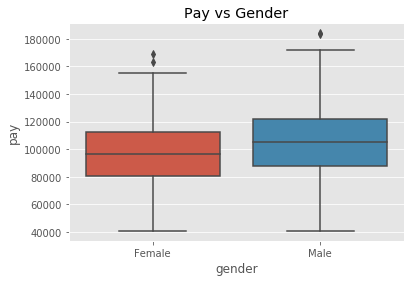

In [4]:
sns.boxplot(x='gender', y = 'pay', data = Data)
plt.title("Pay vs Gender");

La media parece ser mayor para hombres.

#### 1.2
Lleva a cabo una prueba t-student sobre la diferencia en el pago de géneros. ¿Qué se puede concluir?

In [6]:
## A simple t test for difference of means
t2, p2 = stats.ttest_ind(Data.loc[Data['gender'] == 'Male', 'pay'],Data.loc[Data['gender'] == 'Female', 'pay'])
print("t = " + str(t2))
print("p = " + str(p2))

t = 5.407461816876623
p = 8.000016978237565e-08


**Respuesta**.  Hay diferencias estadísticas en el salario. El p-valor es mucho menor a 0.05

#### 1.3
Construye un gráfico de cajas de la variable 'pay' con respecto a los siguientes atributos: 'seniority', 'education', 'jobtitle' y 'performance'. Adicionalmente, construya un diagrama de dispersión entre 'pay' y 'age'.

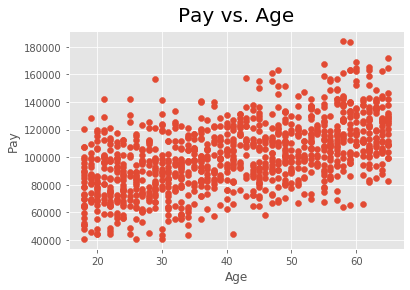

In [11]:
plt.scatter(Data['age'],Data['pay'])
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom');
plt.xlabel("Age");
plt.ylabel("Pay");

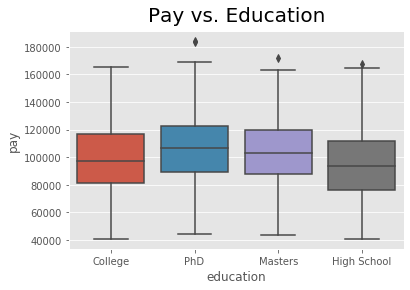

In [17]:
sns.boxplot(x='education', y = 'pay', data = Data) 
plt.title("Pay vs. Education", fontsize=20, verticalalignment='bottom');

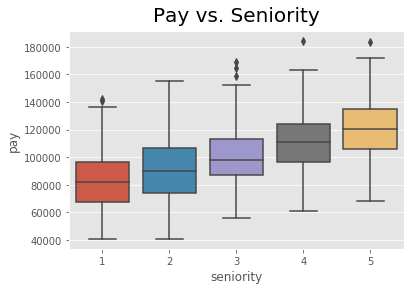

In [18]:
sns.boxplot(x='seniority', y = 'pay', data = Data) 
plt.title("Pay vs. Seniority", fontsize=20, verticalalignment='bottom');

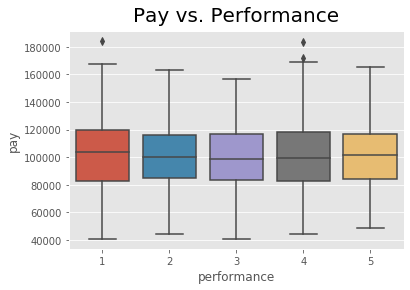

In [19]:
sns.boxplot(x='performance', y = 'pay', data = Data) 
plt.title("Pay vs. Performance", fontsize=20, verticalalignment='bottom');

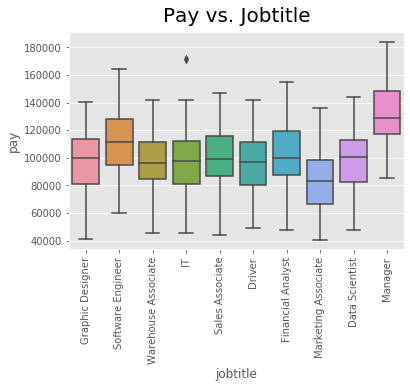

In [20]:
sns.boxplot(x='jobtitle', y = 'pay', data = Data) 
plt.title("Pay vs. Jobtitle", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90);

****Respuesta:****
Hay variación significativa en el pago a través de los diferentes atributos. El pago incrementa con la experiencia y parece que los managers en general tienen un pago alto. En el área de marketing el pago es menor, así como el solo haber terminado la secundaria. Hay una relación lineal entre 'pay' y 'age'.

### Ejercicio 2:
Construya los gráficos del ejercicio 1.3 con la adición de diferenciar por género. Pista: adicione en la función de boxplot el parámetro hue='gender'. ¿Qué patrones observa?

**Respuesta**.

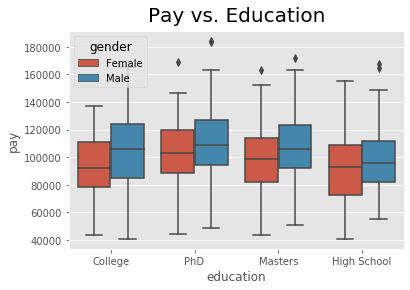

In [8]:
sns.boxplot(x='education', y = 'pay', hue = 'gender', data = Data) 
plt.title("Pay vs. Education", fontsize=20, verticalalignment='bottom');

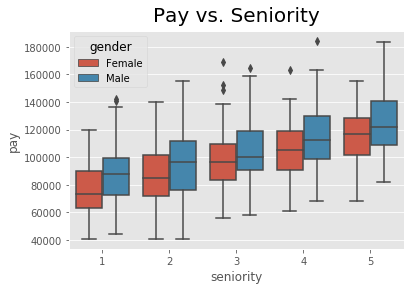

In [9]:
sns.boxplot(x='seniority', y = 'pay', hue = 'gender', data = Data) 
plt.title("Pay vs. Seniority", fontsize=20, verticalalignment='bottom');

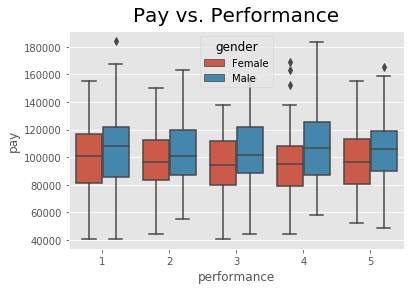

In [10]:
sns.boxplot(x='performance', y = 'pay', hue = 'gender', data = Data) 
plt.title("Pay vs. Performance", fontsize=20, verticalalignment='bottom');

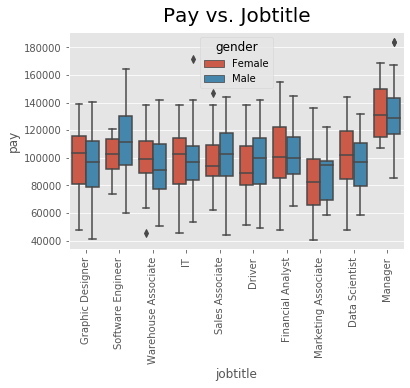

In [11]:
sns.boxplot(x='jobtitle', y = 'pay', hue = 'gender',data = Data) 
plt.title("Pay vs. Jobtitle", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90);

Hay variación en el pago a través de las categorías.

### Ejercicio 3: (10 mts)

Considerando lo siguiente:

I. Basado en los gráficos, el salario promedio de los hombres es 8500 dólares más que el de las mujeres.

II. A los hombres se les paga más solamente por diferencias de género

¿Está de acuerdo con estas afirmaciones?

**Respuesya**. La I es verdadera teniendo en cuenta la información. No es posible concluir sobre la II puesto que todavía falta realizar mayores análisis entre variables sobre los datos.

## ¿Qué variable influyen en el pago?

La única variable numéritca es 'pay' así que empecemos por ver la relación entre 'pay' y 'age':

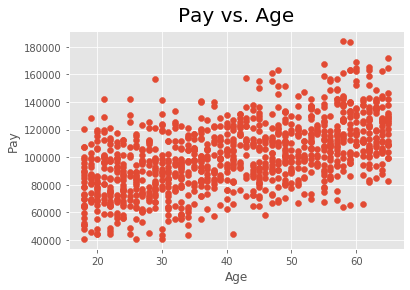

In [12]:
plt.scatter(Data['age'],Data['pay'])
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom')
plt.xlabel("Age")
plt.ylabel("Pay");

### La correlación mide la relación lineal entre 2 variables
Parece haber una correlación positiva entre 'pay' y 'age', entre más viejo se es, más pago se recibe.

### Identifique el signo de correlación (5 mts)

Identifique la correlación en los siguientes escenarios simulados:

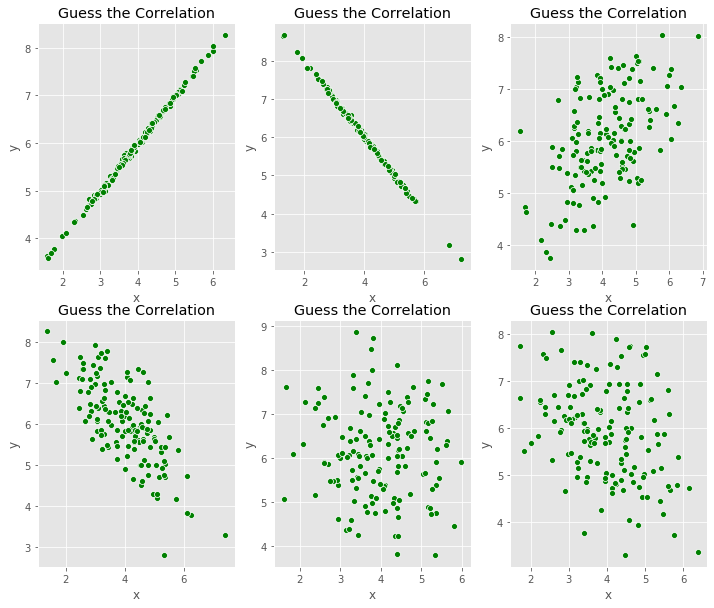

In [13]:
plt.figure(figsize=(12,10))
rho = [0.999, -0.999, 0.5, -0.7,0.001,-0.3]
cor_list = []
np.random.seed(10)
for i, r in enumerate(rho):
    plt.subplot(2,3,i+1)
    mean, cov = [4, 6], [(1, r), (r, 1)]
    x, y = np.random.multivariate_normal(mean, cov, 150).T
    ax = sns.scatterplot(x=x, y=y, color="g")
    cor_list.append(np.corrcoef(x,y)[0,1])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Guess the Correlation")

In [14]:
cor_list

[0.9990081442281227,
 -0.9992506121564401,
 0.5047051300834758,
 -0.7228982219723219,
 -0.040411257687132024,
 -0.3208318426338665]

### Pregunta:

Si la correlación entre 2 variables es cero, entonces las 2 variables no están relacionadas. ¿Es esto verdadero o falso?

**Falso**, puede existir una relación no lineal entre las variables no capturada por la correlación.

### Matriz de correlaciones (10 mts)

In [15]:
corr_mat  = Data[['pay', 'age', 'seniority','performance']].corr()
corr_mat

,pay,age,seniority,performance
pay,1.000000,0.533715,0.530307,0.014155
age,0.533715,1.000000,-0.021414,-0.056875
seniority,0.530307,-0.021414,1.000000,-0.021127
performance,0.014155,-0.056875,-0.021127,1.000000


La podemos visualizar como un mapa de calor:

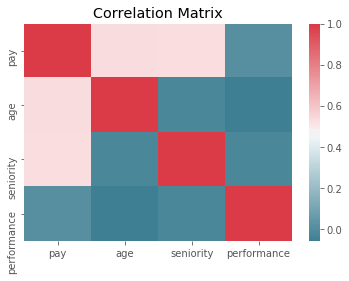

In [16]:
sns.heatmap(corr_mat,cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation Matrix");

## Usando modelos lineales (10mts)
Un modelo lineal ajusta una línea que mejor describa la relación entre variables independientes y la dependiente


Text(-15.075000000000003, 0.5, 'Pay')

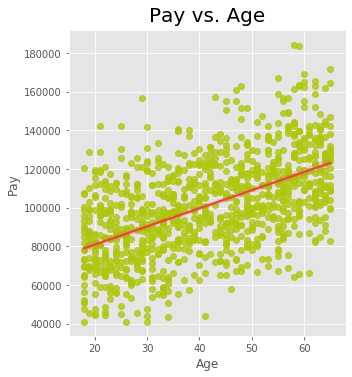

In [17]:
sns.lmplot(x = 'age', y = 'pay', data = Data, scatter_kws = {'color': (174/255,199/255,14/255)})
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom')
plt.xlabel("Age")
plt.ylabel("Pay")

Una línea tiene 2 parámetros – Intercepto ($\beta_0$) and pendiente ($\beta_1$). Así, un modelo lineal de pay vs. age se puede representar como
 $$ \mathrm{pay} = \beta_0 + \beta_1 \mathrm{age} + \mathrm{error}. $$

 $\beta_1$ se interpreta como sigue: en promedio, un incremento de un año de edad llevará a un cambio de $\beta_1$ dólares en pago. El intercepto $\beta_0$ se puede pensar como el pago base, o el pago por defecto sin tener en cuenta la edad.

### Visualización interactiva (10 mts)

La siguiente simulación muestra varios escenerarios, intente adivinar el mejor ajuste:

In [18]:

from bqplot import *
from IPython.display import display
from bqplot.interacts import (
    FastIntervalSelector, IndexSelector, BrushIntervalSelector,
    BrushSelector, MultiSelector, LassoSelector, PanZoom, HandDraw
)
import ipywidgets as widgets
from ipywidgets import *

def run_scenario(scenario='1'):
    
    #determing which scenario this is
    if (scenario == '1'):
        # defining x,y coordinates, scenario 1
        x_coor = [18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]
        y_coor = [50000, 53000, 60000, 59000, 63000, 70000, 67000, 80000, 75000, 88000, 90000, 92000]
    elif (scenario=='2'): 
        # defining x,y coordinates, scenario 1
        x_coor = [18, 26, 28, 30, 32, 34, 36, 38, 40, 20, 24]
        y_coor = [50000, 63000, 70000, 67000, 80000, 75000, 88000, 90000, 92000, 85000, 70000]
    elif (scenario=='3'): 
        # defining x,y coordinates, scenario 1
        x_coor = [18, 20, 22, 32, 34, 36, 38, 40, 38, 36]
        y_coor = [50000, 53000, 60000, 80000, 75000, 88000, 90000, 92000, 50000, 52000]
    elif (scenario=='4'): 
        # defining x,y coordinates, scenario 1
        x_coor = [18, 20, 22, 24, 26, 28, 30, 38, 40, 35, 22]
        y_coor = [50000, 53000, 60000, 59000, 63000, 70000, 67000, 90000, 92000, 55000, 90000]

    # defining linear scale for x,y axes
    x_sc = LinearScale(min=min(x_coor), max=max(x_coor))
    y_sc = LinearScale(min=min(y_coor), max=max(y_coor))

    # creating x,y axes using linear scales above
    ax_x = Axis(label='Age', scale=x_sc, grid_lines='dashed', num_ticks=8, label_color='blue')
    ax_y = Axis(label='Income', scale=y_sc, orientation='vertical', label_color='blue', label_offset='50px')

    #adding scatter marks
    names = []

    for i in range(0, len(x_coor)):
        name = str(x_coor[i]) + ', ' + str(y_coor[i])
        names.append(name)

    def_tt = Tooltip(fields=['x', 'y'], formats=['', '.2f'])

    scatter_dots = Scatter(x=x_coor, y=y_coor, scales={'x': x_sc, 'y': y_sc}, tooltip=def_tt, unhovered_style={'opacity': 0.5})
#     scatter2 = Scatter(x=[x_coor[1]], y=[y_coor[1]], scales={'x': x_sc, 'y': y_sc}, enable_move=True)

    # defining in regression line
    sum_x = 0
    sum_y = 0
    sum_xy = 0
    sum_x_squared = 0
    sum_y_squared = 0
    n = len(x_coor)

    for i in range(0, len(x_coor)):
        sum_x += x_coor[i]
        sum_y += y_coor[i]
        sum_xy += sum_x * sum_y
        sum_x_squared += sum_x * sum_x
        sum_y_squared += sum_y * sum_y


    a = ((sum_y * sum_x_squared) - (sum_x * sum_xy)) / ((n * sum_x_squared) - (sum_x * sum_x))
    b = ((n * sum_xy) - (sum_x * sum_y)) / ((n * sum_x_squared) - (sum_x * sum_x))

    y_hat_values = []

    for x in x_coor:
        new_y_val = a + (b * x)
        y_hat_values.append(new_y_val)

    regression_line = Lines(x=x_coor, y=y_hat_values, scales={'x': x_sc, 'y': y_sc}, colors=['red'], visible=False)

    #user interaction, drawing a line

    user_line_x = [19, 40]
    user_line_y = [60000, 60000]

    starting_user_line = Lines(x=user_line_x, y=user_line_y, scales={'x': x_sc, 'y': y_sc}, colors=['green'])
    
    scatter = Scatter(x=user_line_x, y=user_line_y, scales={'x': x_sc, 'y': y_sc}, unhovered_style={'opacity': 0.5}, enable_move=True, colors=['black'])

    #create figures and render
    fig = Figure(marks=[scatter_dots, scatter, starting_user_line, regression_line], axes=[ax_x, ax_y], title="Find the Regression Line of Best Fit")
    

    #add in dropdown menu
    dropdown = widgets.Dropdown(
        options=['1', '2', '3', '4'],
        value=scenario,
        description='Scenario:',
        disabled=False,
    )

    out = Output()
    display(out)
    
    def handler(x):
        print('hi')
    
    @out.capture()
    def observe_scatter_x_y(point, change):
        
        
        x_array = point.x
        y_array = point.y
        find_change_x = change['point']['x']
        find_change_y = change['point']['y']
        hovered_point = point.hovered_point
        
        
        
        if (hovered_point == 0):
            starting_user_line.set_trait('x', [find_change_x, x_array[1]]) 
            starting_user_line.set_trait('y', [find_change_y, y_array[1]])
#             starting_user_line.y[0] = find_change_y
#             starting_user_line.x[0] = starting_user_line.x.pop(0)
#             starting_user_line.y = starting_user_line.y.pop(0)
#             starting_user_line.x = starting_user_line.x.insert(0, find_change_y)
#             starting_user_line.y = starting_user_line.y.insert(0, find_change_y)
        elif (hovered_point == 1):
            starting_user_line.set_trait('x', [x_array[0], find_change_x]) 
            starting_user_line.set_trait('y', [y_array[0], find_change_y])
#             starting_user_line.x = starting_user_line.x.pop(1)
#             starting_user_line.y = starting_user_line.y.pop(1)
#             starting_user_line.x = starting_user_line.x.insert(1, find_change_y)
#             starting_user_line.y = starting_user_line.y.insert(1, find_change_y)
            
        
        
        
#         if change['name'] == 'x':
#             line.x = line.x + change['new'] - change['old']
#         else:
#             line.y = line.y + change['new'] - change['old']
    
    scatter.on_drag(observe_scatter_x_y)

    @out.capture()
    def on_dropdown_change(b):
        fig.close()
        button.close()
        dropdown.close()
        run_scenario(dropdown.value)
       
    dropdown.observe(on_dropdown_change, 'value')

    #add clicking action for submit
    button = widgets.Button(description="See Answer", button_style='primary',  margin_left='40px', layout=Layout(display='flex', button_color='white', justify_content='center', width='300px'))

    def on_button_clicked(b):
        regression_line.set_trait('visible', True)

    button.on_click(on_button_clicked)
    
    box_layout = Layout(display='flex',
                    justify_content='center',
                    width='50%')

    box = Box(children=[button], layout=box_layout)

    display(dropdown, fig, box)

run_scenario()


Output()

Dropdown(description='Scenario:', options=('1', '2', '3', '4'), value='1')

Figure(axes=[Axis(grid_lines='dashed', label='Age', label_color='blue', num_ticks=8, scale=LinearScale(max=40.…

Box(children=(Button(button_style='primary', description='See Answer', layout=Layout(display='flex', justify_c…

### Residuales (5 mts)

El residual representa la diferencia entre la observación y la predicción de la regresión lineal:

Instrucciones:
    - Pasa el cursor por encima de los puntos para ver sus coordenadas (x,y)
    - Selecciona el punto que tenga el residuo más grande
    - Click en 'See answer' para verficar

In [19]:
from bqplot import *
from IPython.display import display
from bqplot.interacts import (
    FastIntervalSelector, IndexSelector, BrushIntervalSelector,
    BrushSelector, MultiSelector, LassoSelector, PanZoom, HandDraw
)
import ipywidgets as widgets
from ipywidgets import *


# defining x,y coordinates, scenario 1
x_coor = [18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 39]
y_coor = [50000, 53000, 60000, 59000, 63000, 70000, 67000, 80000, 75000, 88000, 90000, 92000, 52000]

# defining linear scale for x,y axes
x_sc = LinearScale(min=min(x_coor), max=max(x_coor))
y_sc = LinearScale(min=min(y_coor), max=max(y_coor))

# creating x,y axes using linear scales above
ax_x = Axis(label='Age', scale=x_sc, grid_lines='dashed', num_ticks=8, label_color='blue')
ax_y = Axis(label='Income', scale=y_sc, orientation='vertical', label_color='blue', label_offset='50px')

#adding scatter marks
names = []

for i in range(0, len(x_coor)):
    name = str(x_coor[i]) + ', ' + str(y_coor[i])
    names.append(name)

def_tt = Tooltip(fields=['x', 'y'], formats=['', '.2f'])

scatter = Scatter(x=x_coor, y=y_coor, scales={'x': x_sc, 'y': y_sc}, opacity=[0.5], tooltip=def_tt, selected_style={'fill':'red', 'stroke': 'red'}, selected=[5])

out = Output()
display(out)


@out.capture()
def on_scatter_click(marks, dot):
    marks.set_trait('selected', [dot['data']['index']])
    
scatter.on_element_click(on_scatter_click)

# defining in regression line
sum_x = 0
sum_y = 0
sum_xy = 0
sum_x_squared = 0
sum_y_squared = 0
n = len(x_coor)

for i in range(0, len(x_coor)):
    sum_x += x_coor[i]
    sum_y += y_coor[i]
    sum_xy += sum_x * sum_y
    sum_x_squared += sum_x * sum_x
    sum_y_squared += sum_y * sum_y


a = ((sum_y * sum_x_squared) - (sum_x * sum_xy)) / ((n * sum_x_squared) - (sum_x * sum_x))
b = ((n * sum_xy) - (sum_x * sum_y)) / ((n * sum_x_squared) - (sum_x * sum_x))

y_hat_values = []

for x in x_coor:
    new_y_val = a + (b * x)
    y_hat_values.append(new_y_val)

regression_line = Lines(x=x_coor, y=y_hat_values, scales={'x': x_sc, 'y': y_sc}, colors=['red'])


#create figures and render
fig = Figure(marks=[scatter, regression_line], axes=[ax_x, ax_y], title='Find the Largest Residual',)


#add clicking action for submit
button = widgets.Button(description="See Answer", button_style='primary',  margin_left='40px', layout=Layout(display='flex', button_color='white', justify_content='center', width='300px'))

@out.capture()
def on_button_clicked(b):
    answer = 12
    scatter.set_trait('selected', [answer])
    residual_line=Lines(x=[x_coor[answer], x_coor[answer]], y=[y_coor[answer], y_hat_values[answer]], scales={'x': x_sc, 'y': y_sc}, colors=['red'])
    fig.set_trait('marks', [scatter, regression_line, residual_line])
    

button.on_click(on_button_clicked)

box_layout = Layout(display='flex',
                    justify_content='center',
                    width='50%')

box = Box(children=[button], layout=box_layout)

display(fig, box)

Output()

Figure(axes=[Axis(grid_lines='dashed', label='Age', label_color='blue', num_ticks=8, scale=LinearScale(max=40.…

Box(children=(Button(button_style='primary', description='See Answer', layout=Layout(display='flex', justify_c…

## Interpretar salida en un modelo lineal (10 mts)

El modelo de 'pay' vs 'age' se puede ajustar de la siguiente manera:

In [20]:
model1 = 'pay~age'
lm1   = sm.ols(formula = model1, data = Data).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     397.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.04e-74
Time:                        19:47:29   Log-Likelihood:                -11384.
No. Observations:                1000   AIC:                         2.277e+04
Df Residuals:                     998   BIC:                         2.278e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.206e+04   2062.885     30.085      0.0

### ¿En qué nos tenemos que concentrar? 

Los coeficientes (las estimaciones de $\beta_0$ y $\beta_1$), así como su $p$-valor and $R$-cuadrado

### Coeficientes
El intercepto $\beta_0$ es alrededor de 62060 dólares. El pago base (Aunque con frecuencia, el intercepto no suele interpretarse) La pendiente ( $\beta_1$ para 'age') es 939.25: si un empleado se vuelve un año más viejo, su salario se incrementará en 935.25 dólares en promedio.

### $p$-valor
Hipótesis nula
$$ H_0:  \beta_1 = 0 $$ 
y la alternativa
$$ H_a: \beta_1 \neq 0.$$
El p-valor de $\beta_1$ (bajo la columna: $"P>|t|"$) es 0.000.  Por ende, es estadísticamente significativo al 0.05 de significancia , y se rechaza la hipótesis nula. Esto implica que la edad explica diferencias en el pago.

## $R$-cuadrado (15 mts)
Siempre está entre 0 y 1. Para este modelo es de 28.5%, y quiere decir que 'age' explica un 28.5% de la variación en 'pay'. Entre más alto el valor, mayor variación explica el modelo. Además, por ser este un valor relativamente bajo, motiva a encontrar más facotres para la regresión.

### Correlación y $R$-cuadrado

In [22]:
corr_age_pay = np.corrcoef(Data['pay'],Data['age'])[0,1]
corr_age_pay*corr_age_pay

0.28485128851108266

### Interpretación geométrica del $R$-Cuadrado
The formula es la siguiente:
  $$ R^2 = 1 - \frac{\mathrm{RSS}}{\mathrm{TSS}} $$
**RSS** y **TSS** denotan la suma de residuos al cuadrado y la suma total al cuadrado respectivamente.

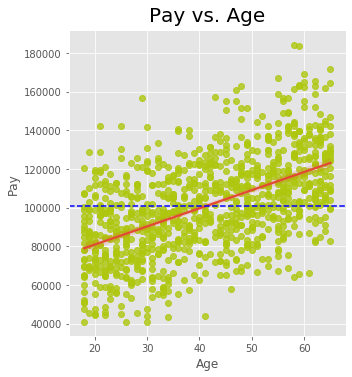

In [23]:
sns.lmplot(x = 'age', y = 'pay', data = Data, scatter_kws = {'color': (174/255,199/255,14/255)})
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom')
plt.axhline(Data['pay'].mean(), ls='--',color = 'b')
plt.xlabel("Age")
plt.ylabel("Pay");

Considere el modelo <code>model0</code> dado por
 $$ \mathrm{pay} = \beta_0 + \mathrm{error} $$
$\beta_0$ es el pago promedio mostrado por la línea azul: **TSS**


**RSS** aplica para la línea roja.

### Calculando el $R$-Cuadrado

In [24]:
# Ver qué contiene el objeto del modelo
dir(lm1)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',

In [25]:
## Residuos de los valores ajustados
res = Data['pay'] - lm1.fittedvalues
res[0:5]

0   -26666.935762
1    37818.313854
2    19568.814110
3    37387.563982
4    22301.063216
dtype: float64

In [26]:
## También accediendo directamente al objeto
lm1.resid[0:5]

0   -26666.935762
1    37818.313854
2    19568.814110
3    37387.563982
4    22301.063216
dtype: float64

In [28]:
# Promedio de 'pay' 
mean_pay = Data['pay'].mean()

## Suma total al cuadrado:
TSS = sum((Data['pay'] - mean_pay)*(Data['pay'] - mean_pay))
TSS

## Suma de residuos al cuadrado
RSS = sum(res*res)

In [29]:
R_squared = (TSS - RSS)/TSS
R_squared

0.2848512885110843

### Género: variable categórica

La interpretación para este tipo de variables es diferente

In [30]:
model2 = 'pay ~ age + gender'
lm2    = sm.ols(formula = model2, data = Data).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     233.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           8.10e-84
Time:                        19:57:54   Log-Likelihood:                -11359.
No. Observations:                1000   AIC:                         2.272e+04
Df Residuals:                     997   BIC:                         2.274e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.674e+04   2151.480     26.

Un hombre gana 9279 dólares más que las mujeres en promedio.

Considerando la educación para poder responder a la pregunta inicial

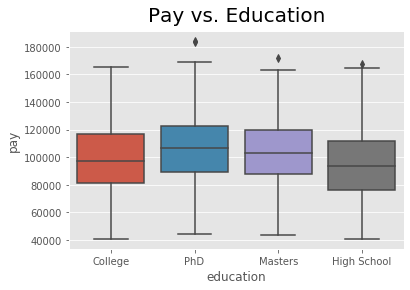

In [31]:
sns.boxplot(x='education', y = 'pay', data = Data) 
plt.title("Pay vs. Education", fontsize=20, verticalalignment='bottom');

### Ejercicio 4: (5 mts)

Construya un modelo de regresión de 'pay' vs 'age' 'gender' y 'education'. Compare el $R$-Cuadrado de este modelo (model3) con el anterior (model2)


**Repsuesta**

In [38]:
model3 = 'pay~age + gender + education'
lm3   = sm.ols(formula = model3, data = Data).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     104.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           8.74e-89
Time:                        08:03:44   Log-Likelihood:                -11340.
No. Observations:                1000   AIC:                         2.269e+04
Df Residuals:                     994   BIC:                         2.272e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Ejercicio 5:

Interprete la variable 'education'


**Respuesta**
Aquellos con educación de secundaria, ganan 3906 dólares menos que aquellos con título de pregrado

## Todas las variables (15 mts)

In [32]:
model4 = 'pay~jobtitle + age + performance + education + department + seniority + gender'
lm4    = sm.ols(formula = model4, data = Data).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     259.6
Date:                Mon, 17 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:30:29   Log-Likelihood:                -10631.
No. Observations:                1000   AIC:                         2.130e+04
Df Residuals:                     979   BIC:                         2.141e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

### Ejercicio 6:

¿Cuál de los siguientes trabajos paga mejor?

(a) Marketing Associate

(b) Software Engineer

(c) Manager

(d) Graphic Designer

**Respuesta**.

C

## Discriminación en el pago

### Ejercicio 7:

Basado en los modelos anteriores, describa si la afirmación es verdadera o falsa:

I. Al tener en cuenta las variables job title, education, performance y age, la diferencia de pago atribuida al género es pequeña

II. Hay evidencia de discriminación en el pago basado solamente por el género

III. Hay mayor presencia de mujeres en trabajos que pagan menos

**Respuesta**


I. Verdadero
II. Falso
III. Verdadero

## Disribución de género a través de experiencia y tipos de trabajo

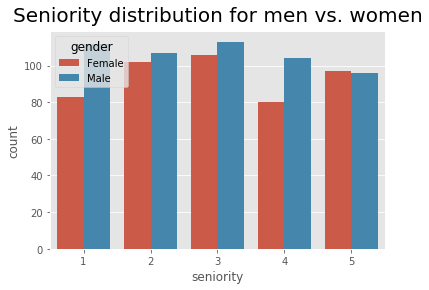

In [33]:
sns.countplot(x='seniority', hue = 'gender', data = Data)
plt.title("Seniority distribution for men vs. women", fontsize=20, verticalalignment='bottom');

El siguiente gráfico muestra la desproporción en número de mujeres para cierto tipo de trabajos

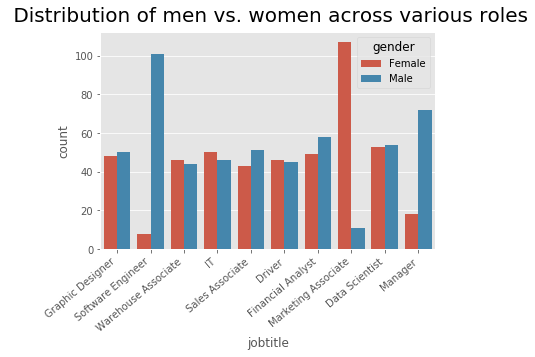

In [34]:
pl = sns.countplot(x="jobtitle", hue= "gender", data= Data)
pl.set_xticklabels(pl.get_xticklabels(), rotation=40, ha="right");
plt.title(" Distribution of men vs. women across various roles", fontsize=20, verticalalignment='bottom');

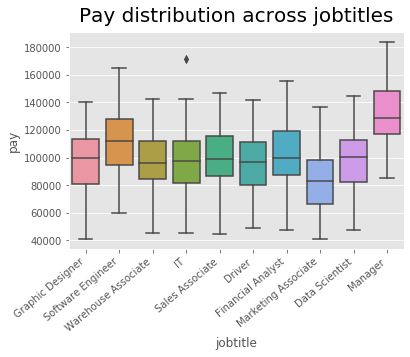

In [35]:
pl2 = sns.boxplot(x="jobtitle", y = "pay", data = Data)
pl2.set_xticklabels(pl2.get_xticklabels(), rotation=40, ha="right");
plt.title("Pay distribution across jobtitles", fontsize=20, verticalalignment='bottom');

Como se ve, los roles en marketing y de manager son los que determinan la desproporción en número de mujeres y hombres para cada uno, traducido en la diferencia de salaros.

## Conclusiones (15 mts)

Debido a que no hay discriminación en el pago a hombres y mujeres, pero dadas las diferencias observadas en el número de muejeres en roles que pagan menos, se podrían plantear las siguientes preguntas:

1. ¿Las mujeres eligen o son forzadas a tomar trabajos que pagan menos?
2. ¿Están las mujeres siendo discriminadas para aplicar a trabajos que pagan más?

## Aprendizajes (5 mts)

1. Muchas veces no basta con ver la relación entre solo 2 variables.
2. El análisis exploratorio es importante antes de realizar el modelo.
3. El uso del $R$-Cuadrado y del $p$-valor.